In [1]:
import pandas as pd

## VIEW DATABASE TRAIN:

In [6]:
path = '/home/lucas/AffectiveComputing/data_source/ceweb/train.csv'

df_train = pd.read_csv(path, delimiter=';')
df_train

,TweetID,Category
0,1407507772149796866,0
1,1407783277793001480,27
2,1407787429831000070,8
3,1407449260774285318,1
4,1407876381254561794,18
...,...,...
47401,1407873257576017923,19
47402,1407885675429564421,21
47403,1407881055571488769,22
47404,1407869225637711875,11


## VIEW DATABASE TEST:


In [2]:
path = '/home/lucas/AffectiveComputing/data_source/ceweb/test.csv'

df_test = pd.read_csv(path, delimiter='\t')
df_test

,tweet_id,tweet,categoria
0,1407499359386734594,admiro o povo que tem paciência,0
1,1407463939517173763,O único jogo que jogo bem é o Guitar Hero. É p...,0
2,1407523515645956097,Amg eu dei uma olhadinha tá muito incrível 🥺😍😍...,0
3,1407524564075171842,sexooo,0
4,1407525154884833281,Sempre foi de direita. Ela não está nem aí par...,0
...,...,...,...
13080,1407707182725046276,como não aproveitar #aşktankaçma,27
13081,1407707358583832586,falta 1 mês pro meu aniversário e eu não aceit...,27
13082,1407707475697192960,Vai embora do Corinthians não aceitamos racist...,27
13083,1407707496773468165,"neste perfil não aceito críticas à gatos, seje...",27


### CLEAN DATABASE:

In [3]:
import re

In [4]:
abbreviations = {'ngm': 'Ninguém', 'sdds': 'saudades', 'sdd': 'saudade',
                 'td': 'tudo', 'qd': 'quando', 'flw': 'falou', 'nte': 'noite', 
                 'vms': 'vamos', 'q': 'que', 'd': 'de', 'bjs': 'beijos', 
                 'vc': 'você', 'pq': 'por que', 'tbm': 'também', 'gnt': 'gente',
                 'obg': 'obrigado',  'n': 'não', 'blz': 'beleza', 'c': 'com',
                 'p': 'para', 'fds': 'fim de semana', 'aki': 'aqui', 'amg': 'amiga', 
                 'vlw': 'valeu', 'ate': 'até', 'cmg': 'comigo', 'pfv': 'por favor',
                 'msm': 'mesmo', 'ta': 'está', 'tá': 'está', 'bj': 'beijo', 
                 'aff': 'irritação'}

In [5]:
dict_regex = {"[\U0001F000-\U0001FFFF]+": "", r'#\S+': "", 
                  r'@\S+': "", r'[^\w\s,.:;?!-]': "",
                  r'\b[k]{2,}\b': "risada"}

In [6]:
df_test['tweet_clean'] = [None for _ in range(df_test.shape[0])]
df_test

,tweet_id,tweet,categoria,tweet_clean
0,1407499359386734594,admiro o povo que tem paciência,0,None
1,1407463939517173763,O único jogo que jogo bem é o Guitar Hero. É p...,0,None
2,1407523515645956097,Amg eu dei uma olhadinha tá muito incrível 🥺😍😍...,0,None
3,1407524564075171842,sexooo,0,None
4,1407525154884833281,Sempre foi de direita. Ela não está nem aí par...,0,None
...,...,...,...,...
13080,1407707182725046276,como não aproveitar #aşktankaçma,27,None
13081,1407707358583832586,falta 1 mês pro meu aniversário e eu não aceit...,27,None
13082,1407707475697192960,Vai embora do Corinthians não aceitamos racist...,27,None
13083,1407707496773468165,"neste perfil não aceito críticas à gatos, seje...",27,None


In [7]:
file = '/home/lucas/AffectiveComputing/data_source/ceweb/List of Lexical items '
list_emotion = []
list_synonym = []
with open(file, 'r') as synonym:
    txts = synonym.read()
    for txt in txts.split('\n'):
        values = txt.split(':')
        list_emotion.append(values[0].lower())
        list_synonym.append(values[1].replace(' ', '').split(';')[1:])
dict_synonym = {
    'emotion': list_emotion,
    'synonym': list_synonym
}
synonym = pd.DataFrame(dict_synonym)
synonym

,emotion,synonym
0,admiração,"[admirável, admiro, admiras, admira, admiramos..."
1,diversão,"[diverto, diverte, divertimos, divertem, diver..."
2,raiva,"[raivoso, raivosa, raviosos, raivosas, fúria, ..."
3,aborrecimento,"[aborreço, aborrece, aborrecemos, aborrecem, a..."
4,provação,"[aprovo, aprovas, aprovamos, aprovais, aprovav..."
5,confusão,"[confundo, confundes, confude, confundimos, co..."
6,curiosidade,"[curioso, curiosa, curiosos, curiosas, curiosa..."
7,desejo,"[desejar, deseja, desejamos, desejais, desejam..."
8,decepção,"[decepcionar, decepciono, decepcionas, decepci..."
9,desaprovação,"[desaprovar, desaprovo, desaprova, desaprovamo..."


In [16]:
import re

frase = "que esta vendo"
nova_frase = re.sub(r'\bque\b', 'q', frase)

print(nova_frase)  # Resultado: "q esta vendo"

q esta vendo


In [19]:
def change_abbreviations(tweet):
    abbreviations = {'ngm': 'ninguém', 'sdds': 'saudades', 'sdd': 'saudade',
                 'td': 'tudo', 'qd': 'quando', 'flw': 'falou', 'nte': 'noite', 
                 'vms': 'vamos', 'q': 'que', 'd': 'de', 'bjs': 'beijos', 
                 'vc': 'você', 'pq': 'por que', 'tbm': 'também', 'gnt': 'gente',
                 'obg': 'obrigado',  'n': 'não', 'blz': 'beleza', 'c': 'com',
                 'p': 'para', 'fds': 'fim de semana', 'aki': 'aqui', 'amg': 'amiga', 
                 'vlw': 'valeu', 'ate': 'até', 'cmg': 'comigo', 'pfv': 'por favor',
                 'msm': 'mesmo', 'ta': 'está', 'tá': 'está', 'bj': 'beijo', 
                 'aff': 'irritação', 'tô': 'estou', 'to': 'estou', 'dms': 'demais', 
                 'dnv': 'denovo', 'dnv': 'de novo'}
    tweet = tweet.replace("  ", ' ')
    for key, values in abbreviations.items():
        tweet = re.sub(fr"\b{key}\b", values, tweet)
    
    return tweet.replace("  ", ' ').strip()

In [20]:
change_abbreviations('amg eu dei uma olhadinha está muito incrível ')

'amiga eu dei uma olhadinha está muito incrível'

In [21]:
def using_regex(tweet):
    dict_regex = {"[\U0001F000-\U0001FFFF]+": " ", r'#\S+': " ", 
                  r'@\S+': " ", r'[^\w\s,.:;?!-]': " ",
                  r'\b[k]{2,}\b': " "}

    for key, values in dict_regex.items():
        tweet = re.sub(key, values, tweet)
    
    return tweet

In [24]:
def drop_size(tweet):
    _tweet = re.sub(r'[^\w\s]', ' ', tweet)
    list_token = _tweet.replace("  ", ' ').replace("  ", ' ').split(' ')
    if '' in list_token: list_token.remove('')
    if len(list_token) > 1:
        return tweet
    return False

In [25]:
for i in range(df_test.shape[0]):
    tweet = df_test.tweet[i]
    if type(tweet) == float: continue
    tweet = tweet.lower()
    tweet = using_regex(tweet)
    tweet = change_abbreviations(tweet)
    tweet = drop_size(tweet)
    df_test.at[i, 'tweet_clean'] = tweet

In [28]:
df_test

,tweet_id,tweet,categoria,tweet_clean
0,1407499359386734594,admiro o povo que tem paciência,0,admiro o povo que tem paciência
1,1407463939517173763,O único jogo que jogo bem é o Guitar Hero. É p...,0,o único jogo que jogo bem é o guitar hero. é p...
2,1407523515645956097,Amg eu dei uma olhadinha tá muito incrível 🥺😍😍...,0,amiga eu dei uma olhadinha está muito incrível...
3,1407524564075171842,sexooo,0,False
4,1407525154884833281,Sempre foi de direita. Ela não está nem aí par...,0,sempre foi de direita. ela não está nem aí par...
...,...,...,...,...
13080,1407707182725046276,como não aproveitar #aşktankaçma,27,como não aproveitar
13081,1407707358583832586,falta 1 mês pro meu aniversário e eu não aceit...,27,falta 1 mês pro meu aniversário e eu não aceit...
13082,1407707475697192960,Vai embora do Corinthians não aceitamos racist...,27,vai embora do corinthians não aceitamos racist...
13083,1407707496773468165,"neste perfil não aceito críticas à gatos, seje...",27,"neste perfil não aceito críticas à gatos, seje..."


In [30]:
synonym

,emotion,synonym
0,admiração,"[admirável, admiro, admiras, admira, admiramos..."
1,diversão,"[diverto, diverte, divertimos, divertem, diver..."
2,raiva,"[raivoso, raivosa, raviosos, raivosas, fúria, ..."
3,aborrecimento,"[aborreço, aborrece, aborrecemos, aborrecem, a..."
4,provação,"[aprovo, aprovas, aprovamos, aprovais, aprovav..."
5,confusão,"[confundo, confundes, confude, confundimos, co..."
6,curiosidade,"[curioso, curiosa, curiosos, curiosas, curiosa..."
7,desejo,"[desejar, deseja, desejamos, desejais, desejam..."
8,decepção,"[decepcionar, decepciono, decepcionas, decepci..."
9,desaprovação,"[desaprovar, desaprovo, desaprova, desaprovamo..."


In [41]:
def clean_dataset(df_test):
    
    df_test = df_test[df_test.tweet_clean != False]
    df_test.index = range(df_test.shape[0])
    list_rm = [i for i in range(df_test.shape[0]) if type(df_test.categoria[i]) == float]

    df_test = df_test.drop(list_rm)
    df_test.index = range(df_test.shape[0])
    list_rm = ["11,15", "18,19", "16,17", "12,13", "20,21", "11,17"]
    for rm in list_rm:
        list_indx = list(df_test[df_test.categoria == rm].index)
        df_test = df_test.drop(list_indx)
    df_test.index = range(df_test.shape[0])
    return df_test
df_test = clean_dataset(df_test)
df_test

,tweet_id,tweet,categoria,tweet_clean
0,1407499359386734594,admiro o povo que tem paciência,0,admiro o povo que tem paciência
1,1407463939517173763,O único jogo que jogo bem é o Guitar Hero. É p...,0,o único jogo que jogo bem é o guitar hero. é p...
2,1407523515645956097,Amg eu dei uma olhadinha tá muito incrível 🥺😍😍...,0,amiga eu dei uma olhadinha está muito incrível...
3,1407525154884833281,Sempre foi de direita. Ela não está nem aí par...,0,sempre foi de direita. ela não está nem aí par...
4,1407501859212910601,é incrível como a maldade está nas curtidas me...,0,é incrível como a maldade está nas curtidas mesmo
...,...,...,...,...
12755,1407707182725046276,como não aproveitar #aşktankaçma,27,como não aproveitar
12756,1407707358583832586,falta 1 mês pro meu aniversário e eu não aceit...,27,falta 1 mês pro meu aniversário e eu não aceit...
12757,1407707475697192960,Vai embora do Corinthians não aceitamos racist...,27,vai embora do corinthians não aceitamos racist...
12758,1407707496773468165,"neste perfil não aceito críticas à gatos, seje...",27,"neste perfil não aceito críticas à gatos, seje..."


In [42]:
synonym['categoria'] = range(synonym.shape[0])
synonym['categoria']= synonym['categoria'].astype(int)

In [43]:
df_test['categoria']= df_test['categoria'].astype(int)

In [44]:
df_test.merge(synonym, on='categoria',how='outer')

,tweet_id,tweet,categoria,tweet_clean,emotion,synonym
0,1407499359386734594,admiro o povo que tem paciência,0,admiro o povo que tem paciência,admiração,"[admirável, admiro, admiras, admira, admiramos..."
1,1407463939517173763,O único jogo que jogo bem é o Guitar Hero. É p...,0,o único jogo que jogo bem é o guitar hero. é p...,admiração,"[admirável, admiro, admiras, admira, admiramos..."
2,1407523515645956097,Amg eu dei uma olhadinha tá muito incrível 🥺😍😍...,0,amiga eu dei uma olhadinha está muito incrível...,admiração,"[admirável, admiro, admiras, admira, admiramos..."
3,1407525154884833281,Sempre foi de direita. Ela não está nem aí par...,0,sempre foi de direita. ela não está nem aí par...,admiração,"[admirável, admiro, admiras, admira, admiramos..."
4,1407501859212910601,é incrível como a maldade está nas curtidas me...,0,é incrível como a maldade está nas curtidas mesmo,admiração,"[admirável, admiro, admiras, admira, admiramos..."
...,...,...,...,...,...,...
12755,1407707182725046276,como não aproveitar #aşktankaçma,27,como não aproveitar,compaixão,"[compaixao, piedade, dó, misericordia, clemenc..."
12756,1407707358583832586,falta 1 mês pro meu aniversário e eu não aceit...,27,falta 1 mês pro meu aniversário e eu não aceit...,compaixão,"[compaixao, piedade, dó, misericordia, clemenc..."
12757,1407707475697192960,Vai embora do Corinthians não aceitamos racist...,27,vai embora do corinthians não aceitamos racist...,compaixão,"[compaixao, piedade, dó, misericordia, clemenc..."
12758,1407707496773468165,"neste perfil não aceito críticas à gatos, seje...",27,"neste perfil não aceito críticas à gatos, seje...",compaixão,"[compaixao, piedade, dó, misericordia, clemenc..."


In [46]:
df_test = df_test.merge(synonym, how='left', on='categoria')

In [108]:
df_test

,category,tweet_clean
0,0,admiro o povo que tem paciência
1,0,o único jogo que jogo bem é o guitar hero. é p...
2,0,amiga eu dei uma olhadinha está muito incrível...
3,0,sempre foi de direita. ela não está nem aí par...
4,0,é incrível como a maldade está nas curtidas mesmo
...,...,...
12754,27,como não aproveitar
12755,27,falta 1 mês pro meu aniversário e eu não aceit...
12756,27,vai embora do corinthians não aceitamos racist...
12757,27,"neste perfil não aceito críticas à gatos, seje..."


In [109]:
for i in range(df_test.shape[0]):
    if df_test.category[i] == 17:
        print(i, f"[{df_test.emotion[i].upper()}]",df_test.tweet_clean[i])

AttributeError: 'DataFrame' object has no attribute 'emotion'

In [111]:
dataframe

,category,tweet_clean
0,0,admiro o povo que tem paciência
1,0,o único jogo que jogo bem é o guitar hero. é p...
2,0,amiga eu dei uma olhadinha está muito incrível...
3,0,sempre foi de direita. ela não está nem aí par...
4,0,é incrível como a maldade está nas curtidas mesmo
...,...,...
12754,27,como não aproveitar
12755,27,falta 1 mês pro meu aniversário e eu não aceit...
12756,27,vai embora do corinthians não aceitamos racist...
12757,27,"neste perfil não aceito críticas à gatos, seje..."


In [113]:
for i in range(df_test.shape[0]):
    if df_test.category[i] == 16:
        print(i, df_test.tweet_clean[i])

8455 não para eu me permitir apaixonar se novamente a pessoa tem que me mostrar que o meu sentimento por ela vai valer a pena!
8456 completamente apaixonada pelo aron piper
8457 a bicha arrasa muito no forró, papi não mentiu live elba e juliette
8458 não tem coisa melhor de quando você está sente uma sensação maravilhosa só por lembrar das pessoas que você ama
8459 23 6 21:55 adrienny pinheiro: deixa eu bota um piercing na bocaa 23 6 21:56 maeee: naaaao 23 6 21:56 adrienny pinheiro: pfvvvvvvvvv 23 6 21:56 maeee: põe no cu que amor
8460 o year 5 b é tão maneiro eu amo demais
8461 eu te amo lonny flash com medo dos nazistas mesmo depois de matar eles eu te amo
8462 eu adoro ver unboxing de livros pra passar vontade
8463 agora me falem algum livro romance bem cliche pra eu tirar esse final da minha cabeça
8464 eu sou apaixonada na clara, que mulher
8465 cara qualquer coisa que me dão da série que eu amo, eu fico super apaixonada sério mesmo
8466 você é a minha esposa
8467 vsf que ódio que

## TRY USED BERT

In [1]:
import numpy as np
import math
import re
import pandas as pd
#from bs4 import BeautifulSoup
import random
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

2023-07-15 14:23:12.432719: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-15 14:23:13.318352: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert

In [8]:
file = '/home/lucas/AffectiveComputing/amor.txt'
list_loves = []
with open(file, 'r') as love:
    txts = love.read()
    for txt in txts.split('\n'):
        values = txt.split(':')
        txt = re.sub(r'\-.*', '', values[0])
        list_loves.append(txt)

dict_amor = {
    'category': [17 for _ in range(len(list_loves))],
    'tweet_clean': list_loves
}
love = pd.DataFrame(dict_amor)
love.drop_duplicates(subset=['tweet_clean'], inplace=True)
love.index = range(love.shape[0])
love

,category,tweet_clean
0,17,O amor é a asa veloz que Deus deu à alma para ...
1,17,"Amar não é olhar um para o outro, é olhar junt..."
2,17,O amor é a força mais poderosa do mundo.
3,17,O amor é a única coisa que cresce à medida que...
4,17,"O amor não se vê com os olhos, mas com o coraç..."
...,...,...
228,17,A paixão é uma tempestade de emoções que nos e...
229,17,A paixão é uma melodia que toca nossos coraçõe...
230,17,A paixão é um oceano de desejo que nos arrasta...
231,17,A paixão é uma chama ardente que ilumina nossa...


In [9]:
df_test = pd.read_csv('/home/lucas/AffectiveComputing/df_test.csv')
df_test.drop(['Unnamed: 0'], axis=1, inplace=True)
df_test

,category,tweet_clean
0,0,admiro o povo que tem paciência
1,0,o único jogo que jogo bem é o guitar hero é p...
2,0,amg eu dei uma olhadinha tá muito incrível t...
3,0,sempre foi de direita ela não está nem aí par...
4,0,é incrível como a maldade está nas curtidas me...
...,...,...
12763,27,como não aproveitar
12764,27,falta 1 mês pro meu aniversário e eu não aceit...
12765,27,vai embora do corinthians não aceitamos racist...
12766,27,neste perfil não aceito críticas à gatos seje...


In [10]:
pd.concat([love, df_test])

,category,tweet_clean
0,17,O amor é a asa veloz que Deus deu à alma para ...
1,17,"Amar não é olhar um para o outro, é olhar junt..."
2,17,O amor é a força mais poderosa do mundo.
3,17,O amor é a única coisa que cresce à medida que...
4,17,"O amor não se vê com os olhos, mas com o coraç..."
...,...,...
12763,27,como não aproveitar
12764,27,falta 1 mês pro meu aniversário e eu não aceit...
12765,27,vai embora do corinthians não aceitamos racist...
12766,27,neste perfil não aceito críticas à gatos seje...


In [11]:
df_test = pd.concat([love, df_test])
df_test.index = range(df_test.shape[0])
df_test

,category,tweet_clean
0,17,O amor é a asa veloz que Deus deu à alma para ...
1,17,"Amar não é olhar um para o outro, é olhar junt..."
2,17,O amor é a força mais poderosa do mundo.
3,17,O amor é a única coisa que cresce à medida que...
4,17,"O amor não se vê com os olhos, mas com o coraç..."
...,...,...
12996,27,como não aproveitar
12997,27,falta 1 mês pro meu aniversário e eu não aceit...
12998,27,vai embora do corinthians não aceitamos racist...
12999,27,neste perfil não aceito críticas à gatos seje...


In [51]:
df_test.columns

Index(['tweet_id', 'tweet', 'categoria', 'tweet_clean', 'emotion', 'synonym'], dtype='object')

In [52]:
dataframe = df_test

In [53]:
df_test.drop(['tweet_id', 'tweet', 'emotion', 'synonym'], axis=1, inplace=True)
df_test.rename({'categoria': 'category'}, axis=1, inplace=True)
df_test

,category,tweet_clean
0,0,admiro o povo que tem paciência
1,0,o único jogo que jogo bem é o guitar hero. é p...
2,0,amiga eu dei uma olhadinha está muito incrível...
3,0,sempre foi de direita. ela não está nem aí par...
4,0,é incrível como a maldade está nas curtidas mesmo
...,...,...
12755,27,como não aproveitar
12756,27,falta 1 mês pro meu aniversário e eu não aceit...
12757,27,vai embora do corinthians não aceitamos racist...
12758,27,"neste perfil não aceito críticas à gatos, seje..."


In [5]:
import tensorflow_text as text 

In [22]:
FullTokenizer = bert.bert_tokenization.FullTokenizer
url_tensor_bert = 'https://tfhub.dev/tensorflow/mobilebert_multi_cased_L-24_H-128_B-512_A-4_F-4_OPT/1'
bert_layer = hub.KerasLayer(url_tensor_bert, trainable=False)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

2023-07-06 10:42:42.876654: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2023-07-06 10:42:42.876677: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: lucas-desktop
2023-07-06 10:42:42.876680: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: lucas-desktop
2023-07-06 10:42:42.876739: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 525.125.6
2023-07-06 10:42:42.876753: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 510.108.3
2023-07-06 10:42:42.876757: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:312] kernel version 510.108.3 does not match DSO version 525.125.6 -- cannot find working devices in this configuration
2023

In [23]:
tokenizer.tokenize('"Amar é mergulhar em um oceano de emoções e se deixar levar pela maré do sentimento."')

['"',
 'Amar',
 'é',
 'mer',
 '##gul',
 '##har',
 'em',
 'um',
 'ocean',
 '##o',
 'de',
 'em',
 '##o',
 '##ções',
 'e',
 'se',
 'deixar',
 'levar',
 'pela',
 'mar',
 '##é',
 'do',
 'sentiment',
 '##o',
 '.',
 '"']

In [60]:
df_test.to_csv('df_test.csv')

In [12]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased', do_lower_case=False)


/usr/local/lib/python3.10/dist-packages/tqdm-4.65.0-py3.10.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
def encode_sentence(sent): #tensorflow/pytorch
  return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sent))

In [14]:
lista_rm = []
for i in range(df_test.shape[0]):
    if str(df_test.tweet_clean[i]) == 'nan':
        lista_rm.append(i)
df_test.drop(lista_rm, inplace=True)
df_test.index = range(df_test.shape[0])

In [63]:
df_test.drop([3713], inplace=True)
df_test.index = range(df_test.shape[0])

In [15]:
data_inputs = [encode_sentence(sentence) for sentence in df_test.tweet_clean]

In [16]:
data_labels = df_test.category.values
data_labels

array([17, 17, 17, ..., 27, 27, 27])

In [17]:
data_with_len = [[sent, data_labels[i], len(sent)]
                 for i, sent in enumerate(data_inputs)]

In [18]:
random.shuffle(data_with_len)
data_with_len.sort(key=lambda x: x[2])
sorted_all = [(sent_lab[0], sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 2]

In [19]:
len(data_with_len)

13000

In [20]:
all_dataset = tf.data.Dataset.from_generator(lambda: sorted_all,
                                             output_types = (tf.int32, tf.int32))

2023-07-15 14:35:34.780951: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2023-07-15 14:35:34.780996: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: lucas-desktop
2023-07-15 14:35:34.781004: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: lucas-desktop
2023-07-15 14:35:34.781178: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 525.125.6
2023-07-15 14:35:34.781203: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 510.108.3
2023-07-15 14:35:34.781208: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:312] kernel version 510.108.3 does not match DSO version 525.125.6 -- cannot find working devices in this configuration


In [21]:
BATCH_SIZE = 32
all_batched = all_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [22]:
NB_BATCHES = len(sorted_all) // BATCH_SIZE
NB_BATCHES_TEST = NB_BATCHES // 10

all_batched.shuffle(NB_BATCHES)
test_dataset = all_batched.take(NB_BATCHES_TEST)
train_dataset = all_batched.skip(NB_BATCHES_TEST)

NB_BATCHES, NB_BATCHES_TEST

(401, 40)

In [23]:
class DCNN(tf.keras.Model):

  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters = 50,
               FFN_units=512,
               nb_classes=28,
               dropout_rate=0.1,
               training=False,
               name="dcnn"):
    super(DCNN, self).__init__(name=name)

    self.embedding = layers.Embedding(vocab_size, emb_dim)

    self.bigram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 2,
                                padding='valid',
                                activation='relu')
    self.trigram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 3,
                                padding='valid',
                                activation='relu')
    self.fourgram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 4,
                                padding='valid',
                                activation='relu')
    
    self.pool = layers.GlobalMaxPool1D()

    self.dense_1 = layers.Dense(units = FFN_units, activation='relu')
    self.dropout = layers.Dropout(rate=dropout_rate)
    self.last_dense = layers.Dense(units=nb_classes, activation='softmax')

  def call(self, inputs, training):
    x = self.embedding(inputs)
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1)
    merged = self.dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output

In [24]:
VOCAB_SIZE = len(tokenizer.vocab)
EMB_DIM = 200 #pode mudar
NB_FILTERS = 100
FFN_UNITS = 256
NB_CLASSES = 28
DROPOUT_RATE = 0.2
NB_EPOCHS = 5

Dcnn = DCNN(vocab_size=VOCAB_SIZE,
            emb_dim=EMB_DIM,
            nb_filters = NB_FILTERS,
            FFN_units = FFN_UNITS,
            nb_classes = NB_CLASSES,
            dropout_rate = DROPOUT_RATE)

Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [25]:
ckpt = tf.train.Checkpoint(Dcnn=Dcnn)

In [26]:
ckpt_manager = tf.train.CheckpointManager(ckpt, '/home/lucas/AffectiveComputing/', max_to_keep=1)

In [27]:
ckpt_manager.latest_checkpoint

In [28]:
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print('Latest checkpoint restored!')

In [29]:
class MyCustomCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    ckpt_manager.save()
    print("Checkpoint savet at {}".format('/home/lucas/AffectiveComputing/'))

In [30]:
history = Dcnn.fit(train_dataset,
                   epochs=NB_EPOCHS,
                   #steps_per_epoch = 100,
                   callbacks=[MyCustomCallBack()])

Epoch 1/5


2023-07-15 14:36:05.059805: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-07-15 14:36:05.060080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


    361/Unknown - 38s 102ms/step - loss: 1.8207 - sparse_categorical_accuracy: 0.5364Checkpoint savet at /home/lucas/AffectiveComputing/
361/361 [==============================] - 38s 103ms/step - loss: 1.8207 - sparse_categorical_accuracy: 0.5364
Epoch 2/5
361/361 [==============================] - 36s 100ms/step - loss: 0.7012 - sparse_categorical_accuracy: 0.8199
Epoch 3/5
361/361 [==============================] - 36s 101ms/step - loss: 0.3700 - sparse_categorical_accuracy: 0.9036
Epoch 4/5
361/361 [==============================] - 36s 101ms/step - loss: 0.1711 - sparse_categorical_accuracy: 0.9586
Epoch 5/5
361/361 [==============================] - 37s 103ms/step - loss: 0.0865 - sparse_categorical_accuracy: 0.9795


In [61]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy'])

Text(0.5, 1.0, 'Loss progress')

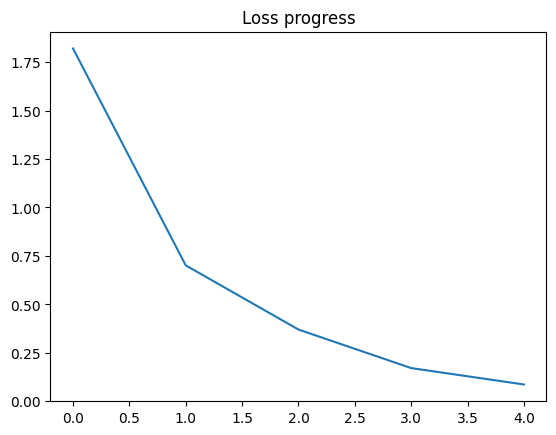

In [31]:
plt.plot(history.history['loss'])
plt.title('Loss progress')

Text(0.5, 1.0, 'Accuracy progress')

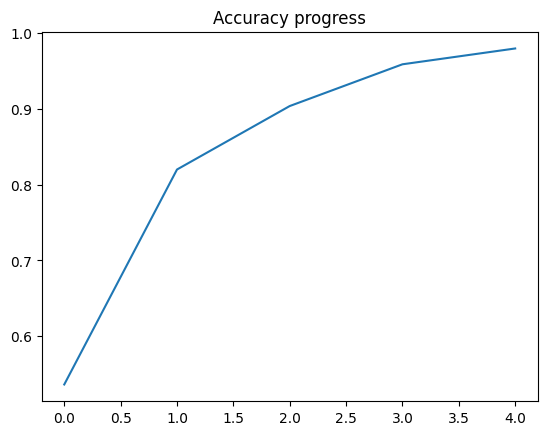

In [32]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.title('Accuracy progress')

In [33]:
try:
    results = Dcnn.evaluate(test_dataset)
except Exception as error:
    pass  # Replace "SpecificError" with the actual error type

print(results)

     24/Unknown - 0s 2ms/step - loss: 1.9978 - sparse_categorical_accuracy: 0.5443  

2023-07-15 14:39:26.071297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-07-15 14:39:26.071728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


40/40 [==============================] - 0s 3ms/step - loss: 1.8499 - sparse_categorical_accuracy: 0.6000
[1.849944829940796, 0.6000000238418579]


In [34]:
def get_prediction(sentence):
    tokens = encode_sentence(sentence)
    inputs = tf.expand_dims(tokens, 0) # (batch_size) (1,...)
    output = Dcnn(inputs, training=False)
    return output[0].numpy()

In [35]:
results = get_prediction('Eu te amo muito !')


In [96]:
texto = """Quem te vê passar assim por mim
Não sabe o que é sofrer
Ter que ver você, assim, sempre tão linda
Contemplar o Sol do teu olhar, perder você no ar
Na certeza de um amor
Me achar um nada
Pois sem ter teu carinho
Eu me sinto sozinho
Eu me afogo em solidão
Oh, Anna Júlia
Oh, Anna Júlia
Nunca acreditei na ilusão de ter você pra mim
Me atormenta a previsão do nosso destino
Eu passando o dia a te esperar
Você sem me notar
Quando tudo tiver fim, você vai estar com um cara
Um alguém sem carinho
Será sempre um espinho
Dentro do meu coração
Oh, Anna Júlia
Oh, Anna Júlia
Sei que você já não quer o meu amor
Sei que você já não gosta de mim
Eu sei que eu não sou quem você sempre sonhou
Mas vou reconquistar o seu amor todo pra mim
Oh, Anna Júlia
Oh, Anna Júlia
Oh, Anna Júlia
Oh, Anna Júlia, Júlia, Júlia
"""
texto

'Quem te vê passar assim por mim\nNão sabe o que é sofrer\nTer que ver você, assim, sempre tão linda\nContemplar o Sol do teu olhar, perder você no ar\nNa certeza de um amor\nMe achar um nada\nPois sem ter teu carinho\nEu me sinto sozinho\nEu me afogo em solidão\nOh, Anna Júlia\nOh, Anna Júlia\nNunca acreditei na ilusão de ter você pra mim\nMe atormenta a previsão do nosso destino\nEu passando o dia a te esperar\nVocê sem me notar\nQuando tudo tiver fim, você vai estar com um cara\nUm alguém sem carinho\nSerá sempre um espinho\nDentro do meu coração\nOh, Anna Júlia\nOh, Anna Júlia\nSei que você já não quer o meu amor\nSei que você já não gosta de mim\nEu sei que eu não sou quem você sempre sonhou\nMas vou reconquistar o seu amor todo pra mim\nOh, Anna Júlia\nOh, Anna Júlia\nOh, Anna Júlia\nOh, Anna Júlia, Júlia, Júlia\n'

In [36]:
file = '/home/lucas/AffectiveComputing/data_source/ceweb/List of Lexical items '
list_emotion = []
list_synonym = []
with open(file, 'r') as synonym:
    txts = synonym.read()
    for txt in txts.split('\n'):
        values = txt.split(':')
        list_emotion.append(values[0].lower())
        list_synonym.append(values[1].replace(' ', '').split(';')[1:])
dict_synonym = {
    'emotion': list_emotion,
    'synonym': list_synonym
}
synonym = pd.DataFrame(dict_synonym)
synonym

,emotion,synonym
0,admiração,"[admirável, admiro, admiras, admira, admiramos..."
1,diversão,"[diverto, diverte, divertimos, divertem, diver..."
2,raiva,"[raivoso, raivosa, raviosos, raivosas, fúria, ..."
3,aborrecimento,"[aborreço, aborrece, aborrecemos, aborrecem, a..."
4,provação,"[aprovo, aprovas, aprovamos, aprovais, aprovav..."
5,confusão,"[confundo, confundes, confude, confundimos, co..."
6,curiosidade,"[curioso, curiosa, curiosos, curiosas, curiosa..."
7,desejo,"[desejar, deseja, desejamos, desejais, desejam..."
8,decepção,"[decepcionar, decepciono, decepcionas, decepci..."
9,desaprovação,"[desaprovar, desaprovo, desaprova, desaprovamo..."


In [41]:
text = """Amor da minha vida, você me machucou
Você partiu meu coração
E agora me deixa

Amor da minha vida, você não entende?
Devolva-me, devolva-me
Não tire isso de mim
Porque você não sabe
O que isso significa para mim (significa para mim)"""
text

'Amor da minha vida, você me machucou\nVocê partiu meu coração\nE agora me deixa\n\nAmor da minha vida, você não entende?\nDevolva-me, devolva-me\nNão tire isso de mim\nPorque você não sabe\nO que isso significa para mim (significa para mim)'

In [105]:
results_prediction = get_prediction(texto.replace('\n', ' '))
#results_prediction = get_prediction('Estou de luto por causa disso!')

In [88]:
results_prediction = results

In [42]:
results_prediction = get_prediction(text.replace('\n', ' '))
results = results_prediction.tolist()
dict_results = {}
for i in range(len(results)):
    dict_results[synonym.emotion[i]] = results[i]
sorted(dict_results.items(), key=lambda x:x[1], reverse=True)

[('amor', 0.9967690706253052),
 ('confusão', 0.0012381771812215447),
 ('raiva', 0.0003527554508764297),
 ('luto', 0.000302592059597373),
 ('vergonha', 0.00024004052102100104),
 ('surpresa', 0.00022641690156888217),
 ('tristeza', 0.0002011329197557643),
 ('nervosismo', 0.000174055909155868),
 ('curiosidade', 0.00012189571862109005),
 ('orgulho', 0.00010930329881375656),
 ('medo', 6.332158227451146e-05),
 ('provação', 4.0299077227246016e-05),
 ('alívio', 3.582059798645787e-05),
 ('otimismo', 3.552666021278128e-05),
 ('gratidão', 2.641598075570073e-05),
 ('diversão', 1.7063182895071805e-05),
 ('alegria', 1.4912380720488727e-05),
 ('remorso', 1.3432442756311502e-05),
 ('aborrecimento', 6.223926902748644e-06),
 ('decepção', 4.724097834696295e-06),
 ('entusiasmo', 2.576622136984952e-06),
 ('desaprovação', 1.7384321608915343e-06),
 ('saudade', 7.338611567320186e-07),
 ('desejo', 6.275371333686053e-07),
 ('admiração', 6.021392664479208e-07),
 ('nojo', 4.0675186596672575e-07),
 ('inveja', 1.287

In [57]:
[('desejo', 0.9857268929481506),
 ('orgulho', 0.009708008728921413),
 ('alegria', 0.0008292482816614211),
 ('gratidão', 0.0006230790168046951),
 ('curiosidade', 0.0005625912453979254),
 ('confusão', 0.0004631966585293412),
 ('saudade', 0.00038135176873765886),
 ('alívio', 0.0003717427025549114),
 ('nervosismo', 0.00030410222825594246),
 ('remorso', 0.00018581986660137773),
 ('diversão', 0.00012507507926784456),
 ('provação', 0.00011692629777826369),
 ('otimismo', 9.82391502475366e-05),
 ('tristeza', 8.391739538637921e-05),
 ('nojo', 7.814684795448557e-05),
 ('medo', 7.030335837043822e-05),
 ('raiva', 5.445870920084417e-05),
 ('entusiasmo', 4.963404353475198e-05),
 ('inveja', 4.0203460230259225e-05),
 ('compaixão', 3.0466286261798814e-05),
 ('desaprovação', 2.597553248051554e-05),
 ('admiração', 2.168631908716634e-05),
 ('surpresa', 1.9602330212364905e-05),
 ('amor', 9.330568900622893e-06),
 ('luto', 8.351513315574266e-06),
 ('vergonha', 5.289730324875563e-06),
 ('aborrecimento', 4.5218798732094e-06),
 ('decepção', 1.6997187231027056e-06)]

numpy.ndarray

In [148]:
df_test.tweet_clean[0]

'admiro o povo que tem paciência'

In [190]:
a

[array([6.7482452e-04, 4.2640222e-03, 1.9252482e-04, 6.5477821e-04,
        6.6491059e-04, 3.4408975e-05, 5.6400481e-03, 3.8439929e-03,
        5.9564132e-04, 1.3834806e-02, 2.2823415e-03, 2.1609990e-04,
        9.1605580e-01, 3.9022586e-03, 6.5433751e-03, 9.9125400e-04,
        6.2939324e-03, 3.3667171e-03, 2.3781317e-03, 3.4506230e-03,
        3.3403753e-04, 2.0086586e-03, 4.8045446e-03, 6.7270128e-03,
        5.5793896e-03, 5.7536821e-05, 3.9563868e-03, 6.5179984e-04],
       dtype=float32)]

In [191]:
a = [6.7482452e-04, 4.2640222e-03, 1.9252482e-04, 6.5477821e-04, 6.6491059e-04,
     3.4408975e-05, 5.6400481e-03, 3.8439929e-03, 5.9564132e-04, 1.3834806e-02,
     2.2823415e-03, 2.1609990e-04, 9.1605580e-01, 3.9022586e-03, 6.5433751e-03,
     9.9125400e-04, 6.2939324e-03, 3.3667171e-03, 2.3781317e-03, 3.4506230e-03,
     3.3403753e-04, 2.0086586e-03, 4.8045446e-03, 6.7270128e-03, 5.5793896e-03,
     5.7536821e-05, 3.9563868e-03, 6.5179984e-04]

In [192]:
a.sort(reverse=True)
a

[0.9160558,
 0.013834806,
 0.0067270128,
 0.0065433751,
 0.0062939324,
 0.0056400481,
 0.0055793896,
 0.0048045446,
 0.0042640222,
 0.0039563868,
 0.0039022586,
 0.0038439929,
 0.003450623,
 0.0033667171,
 0.0023781317,
 0.0022823415,
 0.0020086586,
 0.000991254,
 0.00067482452,
 0.00066491059,
 0.00065477821,
 0.00065179984,
 0.00059564132,
 0.00033403753,
 0.0002160999,
 0.00019252482,
 5.7536821e-05,
 3.4408975e-05]

In [193]:
df_test.category

0         0
1         0
2         0
3         0
4         0
         ..
12763    27
12764    27
12765    27
12766    27
12767    27
Name: category, Length: 12768, dtype: int64